## HW-1.1:

Provide code to read the data and reproduce the figure using Python and seaborn. You may use the pandas package to read and munge the data, and the numpy and matplotlib packages as needed.

See website for an overview, submission details, and more information on the data-set 


### Import

Here are just a few packages you may need, you are welcome to import more

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### HW-1.1.1: 

Use `matplotlib` to re-create the following plot as closely as possible.

In [10]:
# FUNCTION TO VISUALIZE
def fun(x, y):
    # return np.sin(x)*np.sin(y)
    return np.exp(-((x-1)/0.75)**2)*np.exp(-(y/1.5)**2)

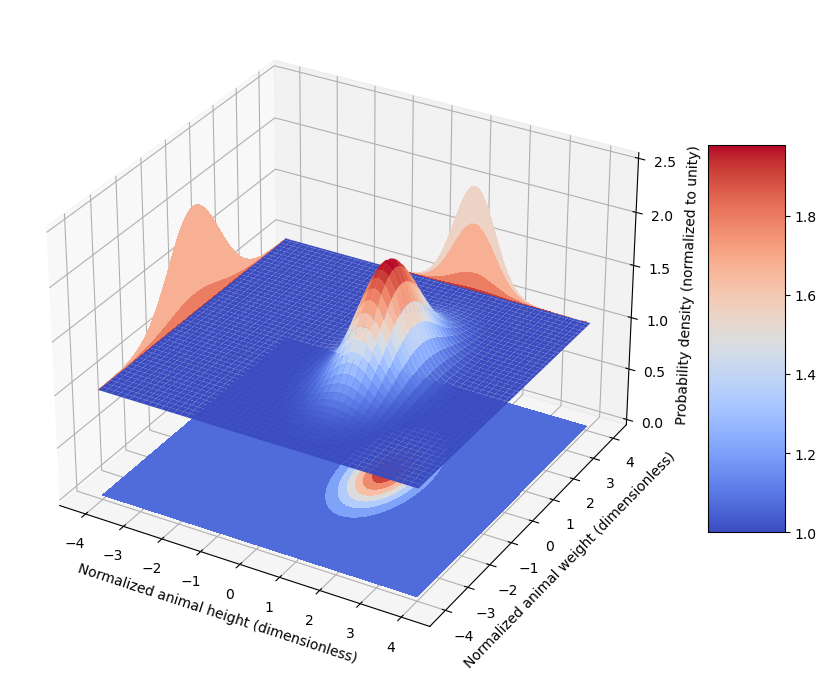

In [90]:
# INSERT CODE HERE
x = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, x)

zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

# plot
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(X, Y, Z + 1, cmap="coolwarm") # surface plot
fig.colorbar(surf, shrink=0.5, aspect=5, fraction=0.1) # color bar

ax.contourf(X, Y, Z, cmap="coolwarm", zdir='z', offset=-0.01) # bottom contour plot
ax.contourf(X, Y, Z + 1, zdir='x', offset=-4, cmap='coolwarm') # left contour plot
ax.contourf(X, Y, Z + 1, zdir='y', offset=4, cmap='coolwarm') # right contour plot

# axes
ax.set(xlim=(-4.5, 4.5), ylim=(-4.5, 4.5), zlim=(0, 2.5),
       xlabel='Normalized animal height (dimensionless)', 
       ylabel='Normalized animal weight (dimensionless)', 
       zlabel='Probability density (normalized to unity)')

plt.show();

### HW-1.1.2 

Use `matplotlib` to re-create the following plot as closely as possible.


In [91]:
#GENERATE DATA
N=500	#number of data points 
x=np.linspace(-45,45.0, N); 
ye=x*x*np.sin(x) #exact
y=ye+np.random.normal(0, 200, N)	#add noise

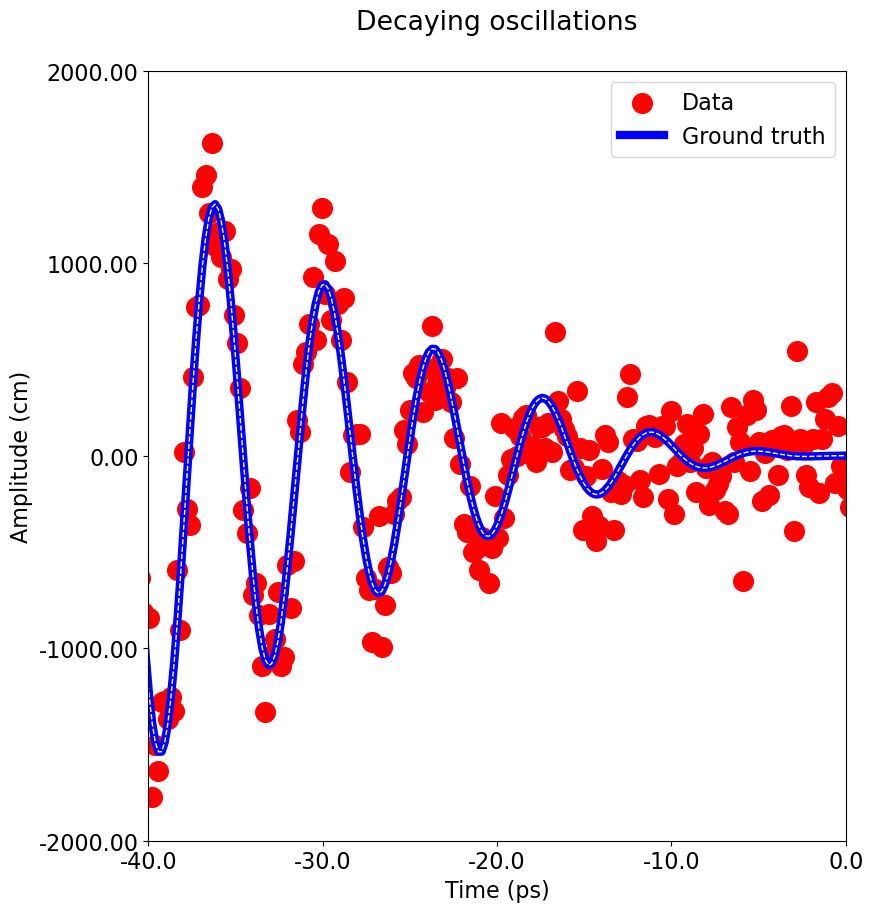

In [151]:
# INSERT CODE HERE
from matplotlib.ticker import FormatStrFormatter

plt.rcParams.update({'font.size': 16})

# plot
fig = plt.figure(figsize=(9,10))
ax = fig.add_subplot()

ax.scatter(x, y, c="red", s=200, label="Data")
ax.plot(x, ye, c="blue", linewidth=6, label="Ground truth")
ax.plot(x, ye, c="white", linestyle='dashed', linewidth=1)
ax.legend(loc="upper right")

# axes
# ref: https://stackoverflow.com/questions/29188757/specify-format-of-floats-for-tick-labels
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) # decimals
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax.yaxis.set_major_locator(plt.MaxNLocator(4)) # number of ticks
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

ax.set(xlim=(-40, 0), ylim=(-2000, 2000),
       xlabel='Time (ps)', 
       ylabel='Amplitude (cm)')
ax.set_title("Decaying oscillations", pad=30)

plt.show();

### HW-1.1.3:

Use `seaborn` & `matplotlib` to re-create the following plot as closely as possible.


In [169]:
# GET THE DATA
PhDPublications = sm.datasets.get_rdataset("PhDPublications", "AER")
PhDPublications = pd.read_csv(
    "https://vincentarelbundock.github.io/Rdatasets/csv/AER/PhDPublications.csv"
)

In [170]:
# INSERT CODE HERE TO GET THE DATA INTO A FORMAT SUITABLE TO RE-CREATE THE VISUALIZATIONS
df = PhDPublications
df.head()

,Unnamed: 0,articles,gender,married,kids,prestige,mentor
0,1,0,male,yes,0,2.52,7
1,2,0,female,no,0,2.05,6
2,3,0,female,no,0,3.75,6
3,4,0,male,yes,1,1.18,3
4,5,0,female,no,0,3.75,26


In [171]:
df.pop(df.columns[0])

0        1
1        2
2        3
3        4
4        5
      ... 
910    911
911    912
912    913
913    914
914    915
Name: Unnamed: 0, Length: 915, dtype: int64

In [179]:
mf = df.loc[(df['married'] == 'yes') & (df['gender'] == 'female')]
mm = df.loc[(df['married'] == 'yes') & (df['gender'] == 'male')]
uf = df.loc[(df['married'] == 'no') & (df['gender'] == 'female')]
um = df.loc[(df['married'] == 'no') & (df['gender'] == 'male')]

/var/folders/0l/7994y9sn0l1d6cxc7lqc26p80000gn/T/ipykernel_62020/3031859546.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


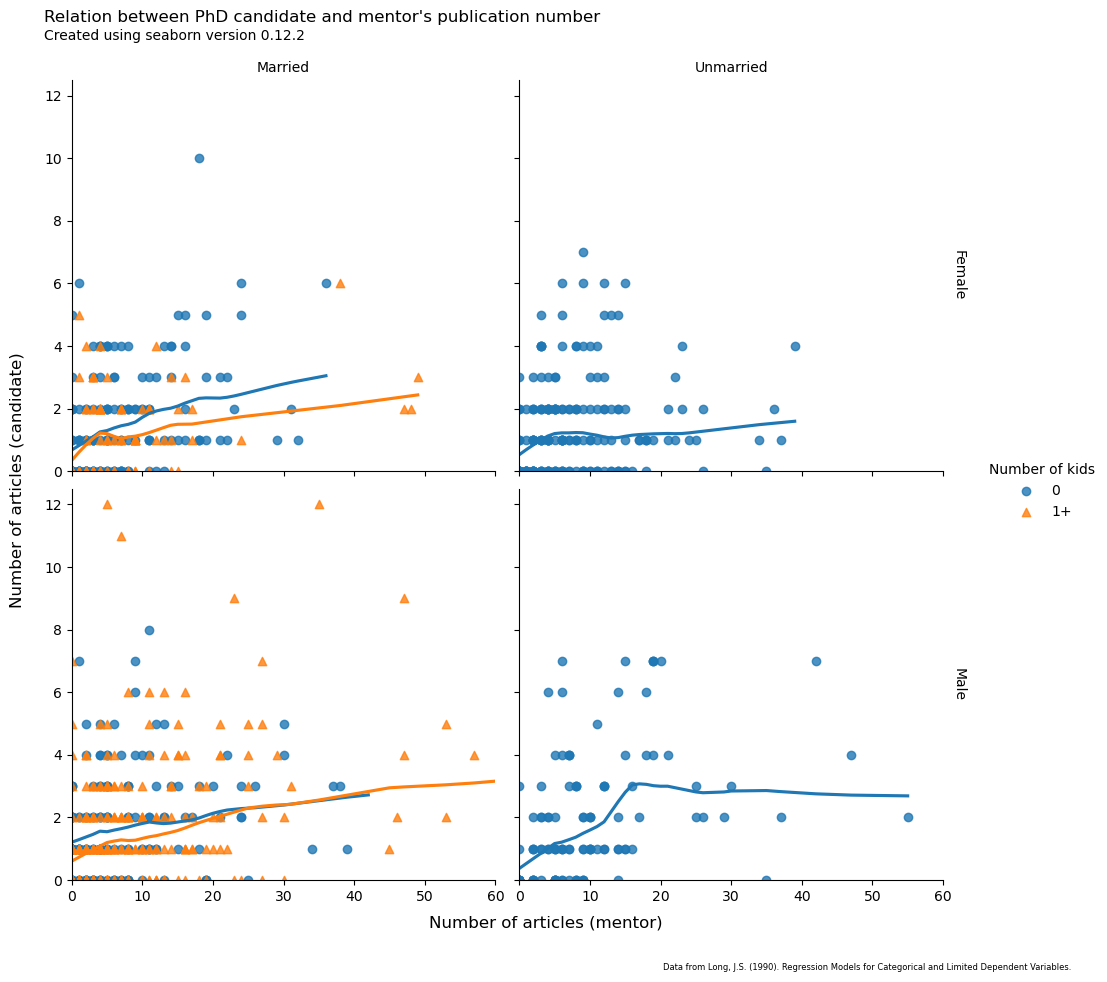

In [8]:
# INSERT CODE HERE

### HW-1.1.4:

Use `seaborn` & `matplotlib` to re-create the following plot as closely as possible.

The lines are the populations for each of the countries in the continent

In [2]:
# GET DATA
gapminder = sm.datasets.get_rdataset("gapminder", "causaldata")["data"]
gapminder["continent"] = pd.Categorical(gapminder["continent"])

print(gapminder)

          country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[1704 rows x 6 columns]


/var/folders/0l/7994y9sn0l1d6cxc7lqc26p80000gn/T/ipykernel_62020/3354735930.py:4: UserWarning: 
The palette list has fewer values (1) than needed (142) and will cycle, which may produce an uninterpretable plot.
  p = sns.relplot(
/var/folders/0l/7994y9sn0l1d6cxc7lqc26p80000gn/T/ipykernel_62020/3354735930.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


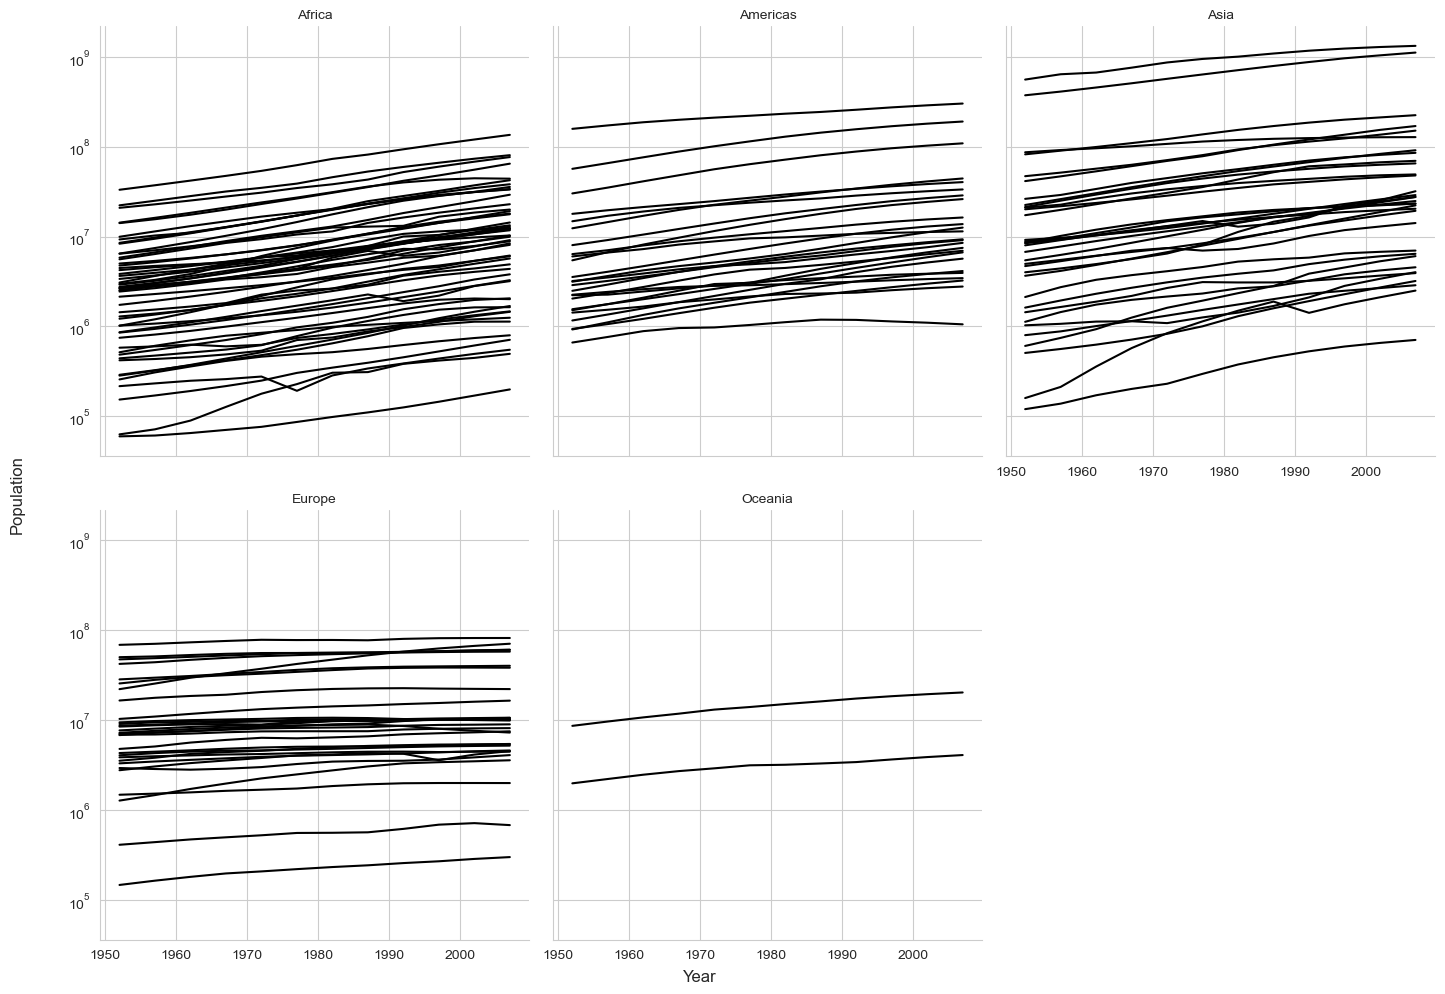

In [10]:
# INSERT CODE HERE 